In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Training-Time Data Augmentation Policies

In [26]:
labels = ['Scaling', 'RotateFrontal', 'RotateSagittal', 'RotateLongitudinal', 'MirroringSagittal', 'MirroringFrontal', 'MirroringAxial', \
         'Gamma', 'InvertedGamma', 'IntensityShifting', 'IntensityScaling', 'Contrast', 'Sharpness', 'Noise', 'SimuLow']
colors_gender = ['#c0c0c0', '#777777', '#595959', '#3c3c3c', '#1f1f1f', '#010101', 
                '#c0c0c0', '#777777', '#595959', '#3c3c3c', '#1f1f1f', 
                '#c0c0c0', '#777777', '#595959', '#3c3c3c', '#1f1f1f',
                '#c0c0c0', '#777777', '#595959', '#3c3c3c', '#1f1f1f', 
                '#c0c0c0', '#010101',
                '#c0c0c0', '#010101',
                '#c0c0c0', '#010101', 
                '#c0c0c0', '#777777', '#3c3c3c', '#010101',
                '#c0c0c0', '#777777', '#3c3c3c', '#010101',
                '#c0c0c0', '#777777', '#3c3c3c', '#010101',
                '#c0c0c0', '#777777', '#3c3c3c', '#010101',
                '#c0c0c0', '#777777', '#3c3c3c', '#010101',
                '#c0c0c0', '#777777', '#3c3c3c', '#010101', '#777777', '#3c3c3c', '#010101',
                '#c0c0c0', '#777777', '#3c3c3c', '#010101', 
                '#c0c0c0', '#777777', '#3c3c3c', '#010101']

In [27]:
''' predefined 3D U-Net '''
policyprob = '4.8        0.24000001 0.24000001 0.24000001 0.24000001 0.24000001 ' \
 '4.5        0.12499999 0.12499999 0.12499999 0.12499999 4.5 ' \
 '0.12499999 0.12499999 0.12499999 0.12499999 4.5        0.12499999 ' \
 '0.12499999 0.12499999 0.12499999 1.         1.         1. ' \
 '1.         1.         1.         2.8        0.40000004 0.40000004 ' \
 '0.40000004 3.6000001  0.13333333 0.13333333 0.13333333 3.8 ' \
 '0.06666666 0.06666666 0.06666666 3.3999999  0.19999999 0.19999999 ' \
 '0.19999999 3.3999999  0.19999999 0.19999999 0.19999999 5.6 ' \
 '0.23333332 0.23333332 0.23333332 0.23333332 0.23333332 0.23333332 ' \
 '3.6000001  0.13333333 0.13333333 0.13333333 3.6000001  0.13333333 ' \
 '0.13333333 0.13333333'

In [28]:
''' predefined v3 - DeepMedic '''
# policyprob = '4.8        0.24000001 0.24000001 0.24000001 0.24000001 0.24000001 ' \
#  '4.         0.25       0.25       0.25       0.25       4. ' \
#  '0.25       0.25       0.25       0.25       4.         0.25 ' \
#  '0.25       0.25       0.25       1.         1.         1.9 ' \
#  '0.09999999 1.9        0.09999999 3.8        0.06666666 0.06666666 ' \
#  '0.06666666 3.8        0.06666666 0.06666666 0.06666666 3.3999999 ' \
#  '0.19999999 0.19999999 0.19999999 3.8        0.06666666 0.06666666 ' \
#  '0.06666666 3.8        0.06666666 0.06666666 0.06666666 6.65 ' \
#  '0.05833333 0.05833333 0.05833333 0.05833333 0.05833333 0.05833333 ' \
#  '3.8        0.06666666 0.06666666 0.06666666 3.8        0.06666666 ' \
#  '0.06666666 0.06666666'

''' predefined v4 - nnformer '''
# policyprob = '5.3999996  0.11999999 0.11999999 0.11999999 0.11999999 0.11999999 ' \
#  '4.5        0.12499999 0.12499999 0.12499999 0.12499999 4.5 ' \
#  '0.12499999 0.12499999 0.12499999 0.12499999 4.5        0.12499999 ' \
#  '0.12499999 0.12499999 0.12499999 1.8        0.19999999 1.8 ' \
#  '0.19999999 1.8        0.19999999 3.6000001  0.13333333 0.13333333 ' \
#  '0.13333333 3.6000001  0.13333333 0.13333333 0.13333333 3.6000001 ' \
#  '0.13333333 0.13333333 0.13333333 3.6000001  0.13333333 0.13333333 ' \
#  '0.13333333 3.6000001  0.13333333 0.13333333 0.13333333 6.2999997 ' \
#  '0.11666664 0.11666664 0.11666664 0.11666664 0.11666664 0.11666664 ' \
#  '3.6000001  0.13333333 0.13333333 0.13333333 3.6000001  0.13333333 ' \
#  '0.13333333 0.13333333'

' predefined v4 - nnformer '

In [29]:
policyprob = policyprob.split(' ')
policyprob = list(filter(None, policyprob))
policyprob = [float(policyprob[i]) for i in range(len(policyprob))]

listr = list(range(62))
policyprob = [policyprob[i] for i in listr]

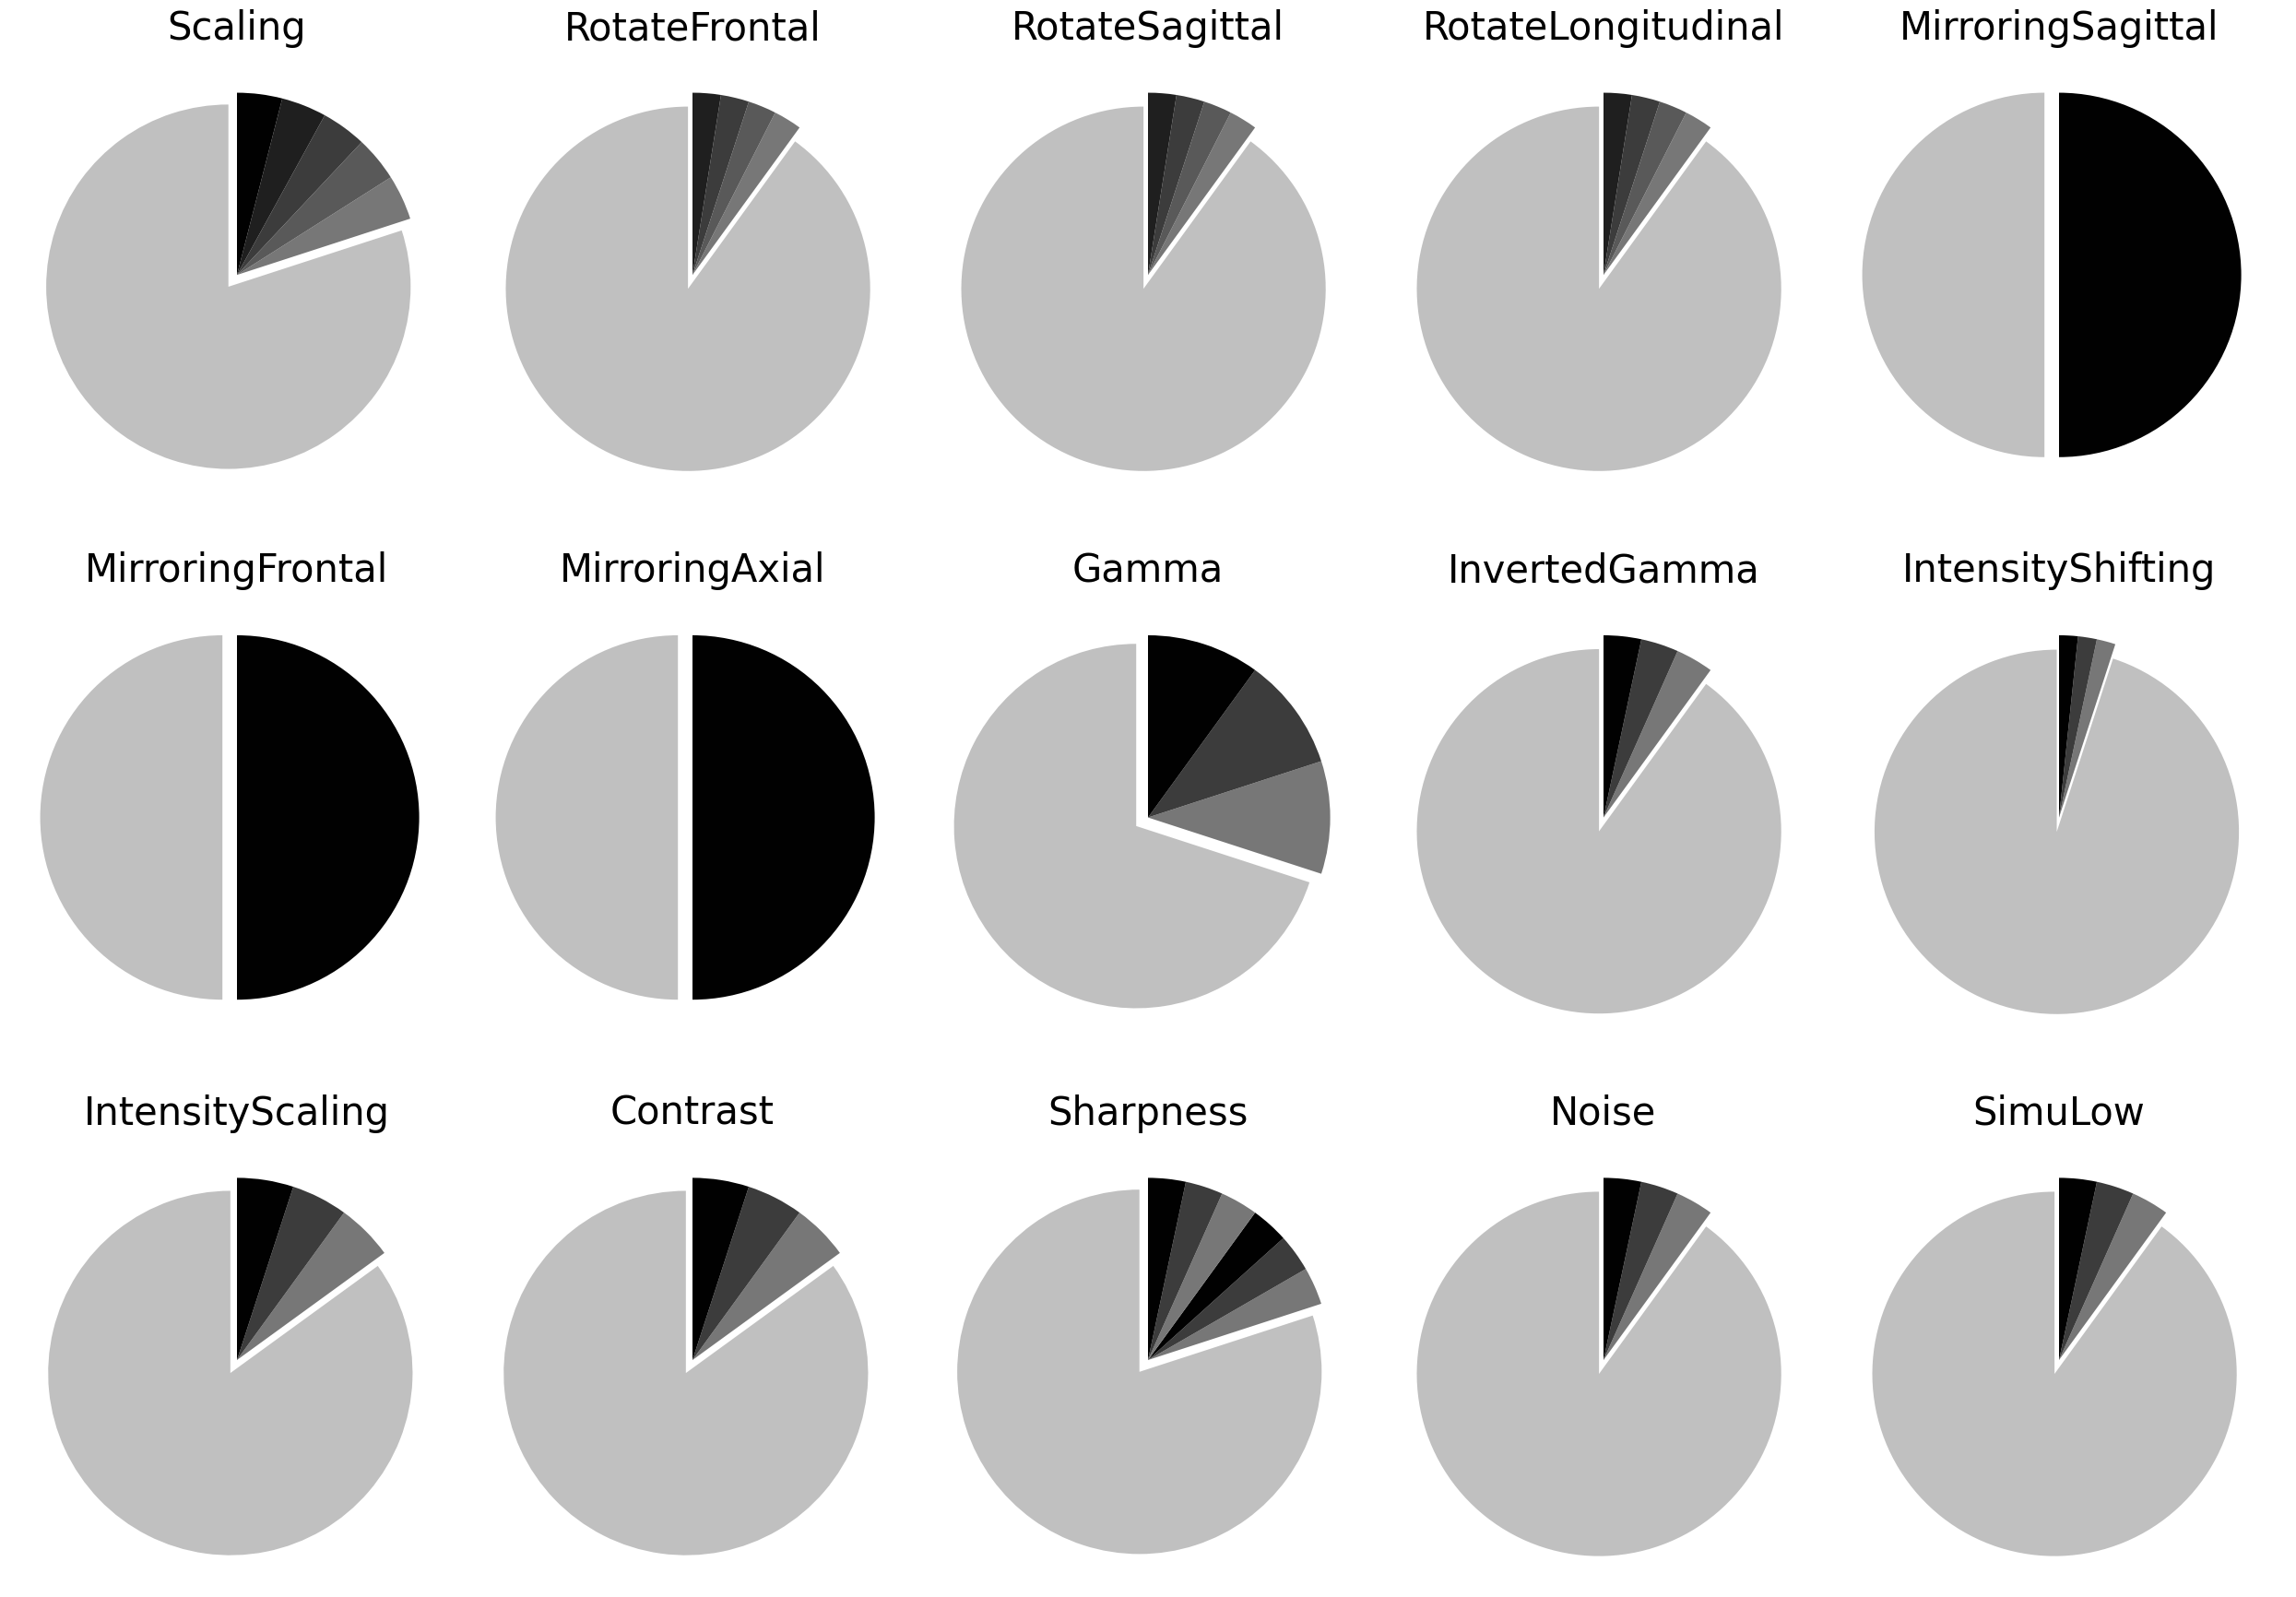

In [50]:
# Data to plot
fig, axs = plt.subplots(3, 5, figsize=(25, 18), gridspec_kw={"wspace": 0, "hspace": 0})

## start plotting part.
## 1
sizes_gender = policyprob[:6]
color = colors_gender[:6]
# Plot
patches, texts = axs[0, 0].pie(sizes_gender, colors=color, startangle=90, radius=1, explode=(0.08, 0, 0, 0, 0, 0))
axs[0, 0].set_title(labels[0], fontdict={'fontsize': 30})


## 2
sizes_gender = policyprob[6:11]
color = colors_gender[6:11]
# Plot
axs[0, 1].pie(sizes_gender, colors=color, startangle=90, radius=1, explode=(0.08, 0, 0, 0, 0))
axs[0, 1].set_title(labels[1], fontdict={'fontsize': 30})

## 3
sizes_gender = policyprob[11:16]
color = colors_gender[11:16]
# Plot
axs[0, 2].pie(sizes_gender, colors=color, startangle=90, radius=1, explode=(0.08, 0, 0, 0, 0))
axs[0, 2].set_title(labels[2], fontdict={'fontsize': 30})

## 4
sizes_gender = policyprob[16:21]
color = colors_gender[16:21]
# Plot
axs[0, 3].pie(sizes_gender, colors=color, startangle=90, radius=1, explode=(0.08, 0, 0, 0, 0))
axs[0, 3].set_title(labels[3], fontdict={'fontsize': 30})

## 5
sizes_gender = policyprob[21:23]
color = colors_gender[21:23]
# Plot
axs[0, 4].pie(sizes_gender, colors=color, startangle=90, radius=1, explode=(0.08, 0))
axs[0, 4].set_title(labels[4], fontdict={'fontsize': 30})

## 6
sizes_gender = policyprob[23:25]
color = colors_gender[23:25]
# Plot
axs[1, 0].pie(sizes_gender, colors=color, startangle=90, radius=1, explode=(0.08, 0))
axs[1, 0].set_title(labels[5], fontdict={'fontsize': 30})

## 7
sizes_gender = policyprob[25:27]
color = colors_gender[25:27]
# Plot
axs[1, 1].pie(sizes_gender, colors=color, startangle=90, radius=1, explode=(0.08, 0))
axs[1, 1].set_title(labels[6], fontdict={'fontsize': 30})

## 8
sizes_gender = policyprob[27:31]
color = colors_gender[27:31]
# Plot
axs[1, 2].pie(sizes_gender, colors=color, startangle=90, radius=1, explode=(0.08, 0, 0, 0))
axs[1, 2].set_title(labels[7], fontdict={'fontsize': 30})

## 9
sizes_gender = policyprob[31:35]
color = colors_gender[31:35]
# Plot
axs[1, 3].pie(sizes_gender, colors=color, startangle=90, radius=1, explode=(0.08, 0, 0, 0))
axs[1, 3].set_title(labels[8], fontdict={'fontsize': 30})

## 10
sizes_gender = policyprob[35:39]
color = colors_gender[35:39]
# Plot
axs[1, 4].pie(sizes_gender, colors=color, startangle=90, radius=1, explode=(0.08, 0, 0, 0))
axs[1, 4].set_title(labels[9], fontdict={'fontsize': 30})

## 11
sizes_gender = policyprob[39:43]
color = colors_gender[39:43]
# Plot
axs[2, 0].pie(sizes_gender, colors=color, startangle=90, radius=1, explode=(0.08, 0, 0, 0))
axs[2, 0].set_title(labels[10], fontdict={'fontsize': 30})

## 12
sizes_gender = policyprob[43:47]
color = colors_gender[43:47]
# Plot
axs[2, 1].pie(sizes_gender, colors=color, startangle=90, radius=1, explode=(0.08, 0, 0, 0))
axs[2, 1].set_title(labels[11], fontdict={'fontsize': 30})

## 13
# labelname = '', '', 'Blurring', '', '', 'Sharpening', ''
labelname = '', '', '', '', '', '', ''
sizes_gender = policyprob[47:54]
color = colors_gender[47:54]
# Plot
axs[2, 2].pie(sizes_gender, colors=color, labels=labelname, labeldistance=0.2, startangle=90, radius=1, 
        explode=(0.08, 0, 0, 0, 0, 0, 0), textprops=dict(color="w", size=12, weight="bold"))
axs[2, 2].set_title(labels[12], fontdict={'fontsize': 30})

## 14
sizes_gender = policyprob[54:58]
color = colors_gender[54:58]
# Plot
axs[2, 3].pie(sizes_gender, colors=color, startangle=90, radius=1, explode=(0.08, 0, 0, 0))
axs[2, 3].set_title(labels[13], fontdict={'fontsize': 30})

## 15
sizes_gender = policyprob[58:]
color = colors_gender[58:]
# Plot
axs[2, 4].pie(sizes_gender, colors=color, startangle=90, radius=1, explode=(0.08, 0, 0, 0))
axs[2, 4].set_title(labels[14], fontdict={'fontsize': 30})

plt.tight_layout()
plt.show()

# Test-Time Data Augmentation Policies

In [51]:
''' predefined 3D U-Net '''
policyprob = '8.400001   0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 ' \
  '0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 ' \
  '0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 ' \
  '0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 ' \
  '0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 8.400001 ' \
  '8.400001   8.400001   0.22105265 0.22105265 8.400001   0.22105265 ' \
  '0.22105265 8.400001   0.22105265 0.22105265 8.400001   0.22105265 ' \
  '0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 ' \
  '0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 ' \
  '0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 ' \
  '0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 ' \
  '0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 ' \
  '0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 ' \
  '0.22105265 0.22105265 0.22105265 0.22105265 0.22105265 8.400001'

''' predefined DeepMedic '''
# policyprob =  '16.800001  0.21      0.21      0.21      0.21      0.21      0.21 ' \
#   '0.21      0.21      0.21      0.21      0.21      0.21      0.21 ' \
#   '0.21      0.21      0.21      0.21      0.21      0.21      0.21 ' \
#   '0.21      0.21      0.21      0.21      0.21      0.21      0.21 ' \
#   '0.21     16.800001 16.800001 16.800001  0.21      0.21      0.21 ' \
#   '0.21      0.21      0.21      0.21      0.21      0.21      0.21 ' \
#   '0.21      0.21      0.21      0.21      0.21      0.21      0.21 ' \
#   '0.21      0.21      0.21      0.21      0.21      0.21      0.21 ' \
#   '0.21      0.21      0.21      0.21      0.21      0.21      0.21 ' \
#   '0.21      0.21      0.21      0.21      0.21      0.21      0.21 ' \
#   '0.21      0.21      0.21      0.21      0.21      0.21      0.21 ' \
#   '0.21      0.21      0.21      0.21      0.21      0.21      0.21'

' predefined DeepMedic '

In [52]:
policyprob = policyprob.split(' ')
policyprob = list(filter(None, policyprob))
policyprob = [float(policyprob[i]) for i in range(len(policyprob))]
listr = list(range(84))
## change some policyprob orders...
listr[17] = 32
listr[18] = 33
listr[19] = 34
##
listr[20] = 17
listr[21] = 18
listr[22] = 19
listr[23] = 20
listr[24] = 21
listr[25] = 22
listr[26] = 35
listr[27] = 36
listr[28] = 37
##
listr[29] = 23
listr[30] = 24
listr[31] = 25
listr[32] = 26
listr[33] = 27
listr[34] = 28
listr[35] = 38
listr[36] = 39
listr[37] = 40
##
listr[38] = 29
listr[39] = 30
listr[40] = 31
listr[41] = 83
##
for klist in range(42,84):
        listr[klist] = klist - 1
policyprob = [policyprob[i] for i in listr]

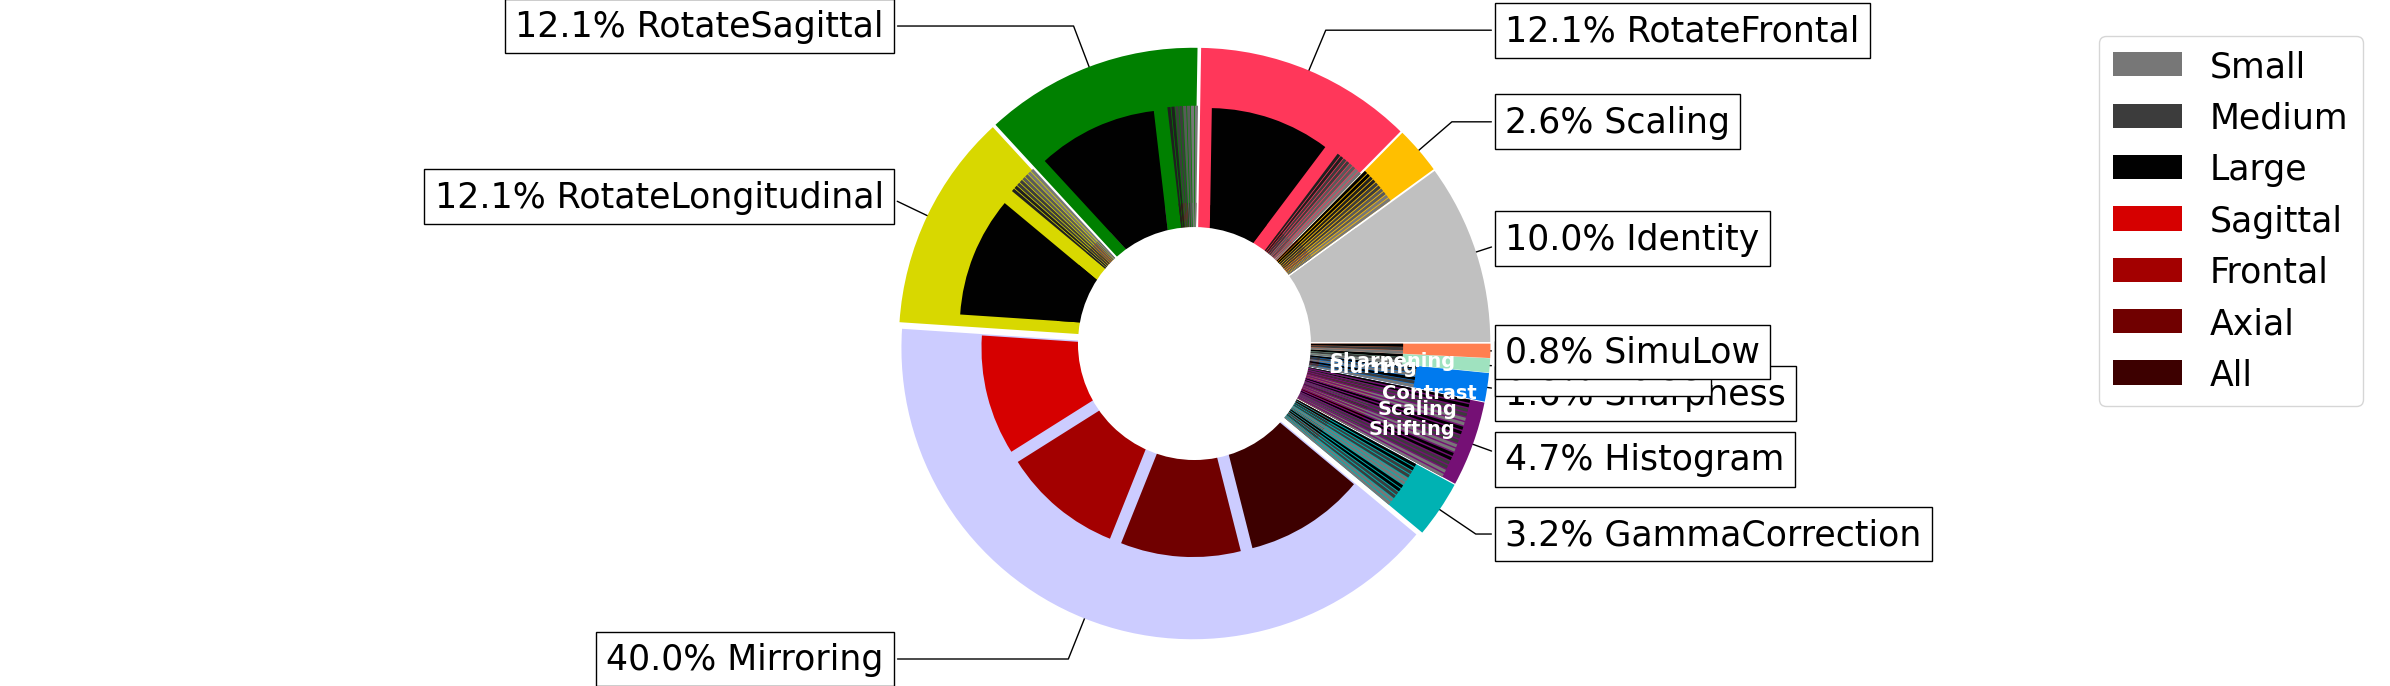

In [53]:
fig, ax = plt.subplots(figsize=(24, 7), subplot_kw=dict(aspect="equal"))
# Data to plot
labels = ['Identity', 'Scaling', 'RotateFrontal', 'RotateSagittal', 'RotateLongitudinal', 'Mirroring', 'GammaCorrection', 'Histogram', 'Sharpness', 'Noise', 'SimuLow']
sizes = [policyprob[0], 
        policyprob[1]+policyprob[2]+policyprob[3]+policyprob[4]+policyprob[5]+policyprob[6]+policyprob[7]+policyprob[8]+policyprob[9]+policyprob[10], 
        policyprob[11]+policyprob[12]+policyprob[13]+policyprob[14]+policyprob[15]+policyprob[16]+policyprob[17]+policyprob[18]+policyprob[19],
        policyprob[20]+policyprob[21]+policyprob[22]+policyprob[23]+policyprob[24]+policyprob[25]+policyprob[26]+policyprob[27]+policyprob[28], 
        policyprob[29]+policyprob[30]+policyprob[31]+policyprob[32]+policyprob[33]+policyprob[34]+policyprob[35]+policyprob[36]+policyprob[37],
        policyprob[38]+policyprob[39]+policyprob[40]+policyprob[41],
        policyprob[42]+policyprob[43]+policyprob[44]+policyprob[45]+policyprob[46]+policyprob[47]+policyprob[48]+policyprob[49]+policyprob[50]+policyprob[51]+policyprob[52]+policyprob[53], 
        policyprob[54]+policyprob[55]+policyprob[56]+policyprob[57]+policyprob[58]+policyprob[59]+policyprob[60]+policyprob[61]+policyprob[62]+policyprob[63]+policyprob[64]+policyprob[65]+policyprob[66]+policyprob[67]+policyprob[68]+policyprob[69]+policyprob[70]+policyprob[71], 
        policyprob[72]+policyprob[73]+policyprob[74]+policyprob[75]+policyprob[76]+policyprob[77], 
        policyprob[78]+policyprob[79]+policyprob[80], 
        policyprob[81]+policyprob[82]+policyprob[83]]
sizesm = np.array(sizes) / sum(np.array(sizes))
for k in range(len(labels)):
    numpro = round(sizesm[k] * 100, 1)
    labels[k] = str(numpro) + '% ' + labels[k]
labels_gender = ['Small', 'Medium', 'Large', 'Sagittal', 'Frontal', 'Axial', 'All']
sizes_gender = policyprob
colors_gender = ['#c0c0c0', 
                '#777777', '#777777', '#595959', '#595959', '#3c3c3c', '#3c3c3c', '#1f1f1f', '#1f1f1f', '#010101', '#010101', 
                '#777777', '#777777', '#595959', '#595959', '#3c3c3c', '#3c3c3c', '#1f1f1f', '#1f1f1f', '#010101', 
                '#777777', '#777777', '#595959', '#595959', '#3c3c3c', '#3c3c3c', '#1f1f1f', '#1f1f1f', '#010101', 
                '#777777', '#777777', '#595959', '#595959', '#3c3c3c', '#3c3c3c', '#1f1f1f', '#1f1f1f', '#010101', 
                '#d60000', '#a30000', '#700000', '#3d0000',
                '#777777', '#777777', '#3c3c3c', '#3c3c3c', '#010101', '#010101', '#777777', '#777777', '#3c3c3c', '#3c3c3c', '#010101', '#010101',
                '#777777', '#777777', '#3c3c3c', '#3c3c3c', '#010101', '#010101', '#777777', '#777777', '#3c3c3c', '#3c3c3c', '#010101', '#010101', '#777777', '#777777', '#3c3c3c', '#3c3c3c', '#010101', '#010101',
                '#777777', '#3c3c3c', '#010101', '#777777', '#3c3c3c', '#010101',
                '#777777', '#3c3c3c', '#010101', 
                '#777777', '#3c3c3c', '#010101']
colors_genders = ['#777777', '#3c3c3c', '#010101', '#d60000', '#a30000', '#700000', '#3d0000']
outer_colors = ['#c0c0c0', '#ffbf00', '#ff375a', '#008000', '#d8d800', '#ccccff', '#00b2b3', '#751075', '#007aee', '#9fe2bf', '#ff7f50']
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
explode_gender = (0.05,
                0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50,
                0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
                0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
                0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
                0.20, 0.20, 0.20, 0.20,
                0.60, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60,
                0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90,
                0.30, 0.30, 0.30, 0.30, 0.30, 0.30,
                0.15, 0.15, 0.15, 
                0.15, 0.15, 0.15
                )

labelname = ['', 
        '', '', '', '', '', '', '', '', '', '', 
        '', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '',
        '', '', '', '', '',  '', '', '', '',
        '', '', '', '',
        '', '', '', '', '', '', '', '', '', '', '', '',
        '', '', 'Shifting', '', '', '', '', '', '', 'Scaling', '', '', '', '', 'Contrast', '', '', '', 
        '', 'Blurring', '', '', 'Sharpening', '',
        '', '', '', 
        '', '', '']
# Plot
wedges, texts = plt.pie(sizes, colors=outer_colors, startangle=0, frame=True, explode=explode, radius=3)
patches, texts = plt.pie(sizes_gender, labels=labelname, colors=colors_genders, startangle=0, explode=explode_gender, radius=1, textprops=dict(color="w", size=14, weight="bold"))
plt.pie(sizes_gender, colors=colors_gender, startangle=0, explode=explode_gender, radius=2)
# Draw circle
centre_circle = plt.Circle((0, 0), 1.2, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=1)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(3.2*np.sign(x), 3.5*y),
                horizontalalignment=horizontalalignment, **kw, fontsize = 25)


plt.legend(patches, labels_gender, loc="best", fontsize = 25)

plt.axis('equal')
plt.tight_layout()
plt.show()